# Planteamiento del problema

Se tiene un reactor CSTR con un flujo de entrada $F_{1}$ con una concentración $C_{A,1}$ y un flujo de salida $F$ con una concentración $C_{A}$. Se asumen volumen y temperatura constantes.

## Para una reacción de la forma $A\rightarrow B$

Del balance de materia por componentes, se obtiene que:

$$\frac{dC_{A}}{dt}=\frac{F}{V}\left(C_{A,1}-C_{A}\right)-r_{A}$$

Donde:
$$r_{A}=kC_{A}$$

Susituyendo:

$$\frac{dC_{A}}{dt}=\frac{F}{V}\left(C_{A,1}-C_{A}\right)-kC_{A}$$

Para el balance de $B$:

$$\frac{dC_{B}}{dt}=-\frac{F}{V}C_{B}+kC_{A}$$

## Para una reacción de Van de Vusse

La reacción de Van de Vusse es una reacción en serie de la forma:

$$A\rightarrow^{k_{1}}B\rightarrow^{k_{2}}C$$
$$2A\rightarrow^{k_{3}}D$$

El balance de $A$:

$$\frac{dC_{A}}{dt}=\frac{F}{V}\left(C_{A,1}-C_{A}\right)-k_{1}C_{A}-k_{3}C_{A}^2$$

El balance de $B$:

$$\frac{dC_{B}}{dt}=-\frac{F}{V}C_{B}+k_{1}C_{A}-k_{2}C_{B}$$

El balance de $C$:

$$\frac{dC_{C}}{dt}=-\frac{F}{V}C_{C}+k_{2}C_{B}$$

Por último, el balance de $D$:

$$\frac{dC_{D}}{dt}=-\frac{F}{V}C_{D}+\frac{1}{2}k_{3}C_{A}^2$$

# Problema 1

Para una reacción de Van der Vusse, en el estado estacionario:

$$C_{A}=\frac{F}{Vk_{1}}\left(C_{A,1}-C_{A}\right)-\frac{k_{3}}{k_{1}}C_{A}^2$$

Donde $C_{A,1}=10\textrm{ mol/L}$, $k_{1}=5/6\textrm{ min}^{-1}$, $k_{2}=5/3\textrm{ min}^{-1}$, $k_{3}=1/6\textrm{ mol/(L min)}$ y $F/V=0.5\textrm{ min}^{-1}$ se desea encontrar las condiciones iniciales.

La solución se realizará por medio de la función ```Wegstein```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FV=0.5# min^-1
Ca1=10 # mol/L
k1=5/6 # min^-1
k2=5/3 # min^-1
k3=1/6 # mol/(L min)

In [3]:
def Wegstein(Xc,x,tol):
    # Primera iteración
    xC=Xc(x)
    x1=x
    xc1=xC
    x2=xC
    xN=x2
    x=xN
    error=1
    n=1
    while np.mean(error)>tol:
        xc2=Xc(x)
        x3=(x1*xc2-x2*xc1)/(x1-x2+xc2-xc1)
        x1=x2
        xc1=xc2
        x2=x3
        xN=x3
        error=abs((xN-x)/(x+xN))
        x=xN
        n+=1
    return x,n,error

In [4]:
def InicioA(Ca):
    return FV/k1*(Ca1-Ca)-k3*Ca**2/k1

In [5]:
def InicioB(Ca):
    return k1*Ca/(FV+k2)

In [6]:
Ca0,_,_=Wegstein(InicioA,0,1e-5)
Ca0

2.7823299831227244

In [7]:
Cb0=InicioB(Ca0)
Cb0

1.0701269165856633

## Probando para distintos valores de $F/V$

In [8]:
FV_array=np.arange(0,5.1,0.1)
Ca0_array=np.zeros_like(FV_array)
Cb0_array=np.zeros_like(FV_array)
for i in range(len(FV_array)):
    FV=FV_array[i]
    Ca0i,_,_=Wegstein(InicioA,0,1e-5)
    Ca0_array[i]=Ca0i
    Cb0_array[i]=InicioB(Ca0_array[i])

C:\Users\allan\AppData\Local\Temp/ipykernel_3360/4269551723.py:13: RuntimeWarning: invalid value encountered in double_scalars
  x3=(x1*xc2-x2*xc1)/(x1-x2+xc2-xc1)


In [9]:
plt.plot(FV_array,Cb0_array)
plt.show()

## Resolviendo las ecuaciones diferenciales

Ahora, que se conocen los valores iniciales, se propone resolver el sistema cuando en $t=0$ se utiliza $F/V=0.6\textrm{ min}^{-1}$. Esto se hará mediante el método de Euler.

In [16]:
FV=3.265

In [17]:
def Concentración(C):
    return np.array([FV*(Ca1-C[0])-k1*C[0]-k3*C[0]**2,-FV*C[1]+k1*C[0]-k2*C[1]])

In [18]:
h=1e-3
t=np.arange(0,5+h,h)
C=np.zeros(shape=(len(t),2))
C[0,0]=Ca0
C[0,1]=Cb0

In [19]:
for i in range(len(t)-1):
    C[i+1]=C[i]+h*Concentración(C[i])

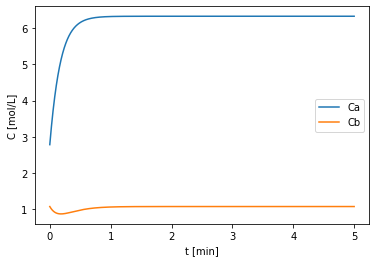

In [20]:
plt.plot(t,C[:,0])
plt.plot(t,C[:,1])
plt.xlabel("t [min]")
plt.ylabel("C [mol/L]")
plt.legend(["Ca","Cb"])
plt.show()

# Agregando una chaqueta al reactor

Al problema anterior se le incluye una chaqueta que permite que exoista intercambio de temperatura. El balance de energía se debe incluir la energía por la reacción, de forma que:

$$\frac{dC_{A}}{dt}=\frac{F}{V}\left(C_{A,1}-C_{A}\right)-kC_{A}$$

$$\frac{dT}{dt}=\frac{F_{1}}{V}\left(T_{1}-T\right)+\frac{\left(-\Delta H_{g}\right)}{\rho C_{p}}kC_{A}-\frac{Q}{\rho VC_{p}}$$

$$k=k_{0}\exp{\left(-\frac{E}{RT}\right)}$$
$$Q=UA\left(T-T_{j}\right)$$

In [21]:
F=100 # L/min
Ca1=1 # mol/L
T1=350 # K
V=100 # L
rho=1000 # g/L
Cp=0.239 # J/(g K)
dHg=5e4 # J/mol
E_R=8750 # K
k0= 7.2e10 # min^-1
UA=5e4 # J/(min K)
Tj0=300 # K
Ca0=0.5 # mol/L
T0=350 # K

In [22]:
t=np.arange(0,100+h,h)
Ca=np.zeros_like(t)
T=np.zeros_like(t)

In [ ]:
def Arrhenius(T):
    return k0*np.exp(-E_R/T)

Se obtiene $F_{1}$ a partir del despeje del estado estacionario:

$$F_{1}=\frac{UA\left(T-T_{j}\right)}{\left(T_{1}-T\right)\rho C_{p}}-\frac{\left(-\Delta H_{g}\right)}{\left(T_{1}-T\right)\rho C_{p}}Vk_{0}\exp{\left(-\frac{E}{RT}\right)}C_{A}$$

In [ ]:
def Solución(X):
    return np.array([F*(Ca1-X[0])/V-Arrhenius(X[1])*X[0],F1*(T1-X[1])/V+dHg*Arrhenius(X[1])*X[0]/rho/Cp-UA*(X[1]-Tj0)/rho/V/Cp])